In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

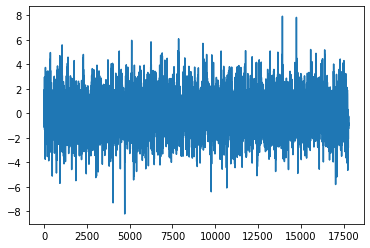

In [4]:
# training_set = pd.read_csv('train_v2.3.csv')
#training_set = pd.read_csv('shampoo.csv')

training_set = df1.iloc[0,:-1].values

plt.plot(training_set, label = 'Shampoo Sales Data')
plt.show()

In [2]:
df = pd.read_csv('train_v2.3.csv')

In [3]:
df1 = pd.DataFrame(df.values.T)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,2989,2990,2991,2992,2993,2994,2995,2996,2997,y
0,0.00000,-0.40625,-0.15625,-0.53125,-0.12500,0.00000,-0.43750,0.12500,0.25000,0.43750,...,0.03125,0.06250,0.84375,0.06250,0.62500,0.87500,0.34375,0.62500,0.25000,-1.0
1,0.06250,0.65625,0.15625,0.59375,0.31250,0.21875,0.03125,-0.15625,-0.25000,-0.50000,...,-0.12500,-0.28125,-0.34375,0.18750,-1.18750,-0.65625,-0.46875,-0.62500,-1.18750,-1.0
2,0.53125,0.09375,0.56250,0.18750,-0.53125,-0.78125,0.00000,0.68750,0.18750,0.75000,...,-0.71875,-0.37500,-0.40625,-0.43750,-0.25000,-0.71875,-0.78125,-1.50000,-1.40625,-1.0
3,-0.28125,0.15625,-0.37500,-0.71875,-0.09375,-0.50000,-0.28125,0.96875,0.96875,1.81250,...,0.15625,0.31250,0.15625,0.09375,-0.25000,-0.18750,-0.12500,-0.62500,-0.31250,-1.0
4,1.12500,1.53125,0.75000,-0.15625,-0.15625,-1.21875,-1.28125,-0.21875,0.53125,0.62500,...,0.43750,0.25000,-0.34375,0.18750,0.00000,-0.18750,0.46875,-0.28125,-0.34375,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17787,-0.37500,-0.96875,-1.03125,-1.71875,-1.46875,-1.46875,-1.31250,-0.62500,-0.84375,-1.28125,...,-1.15625,-1.40625,-1.03125,-0.59375,-0.21875,-0.18750,-0.34375,0.18750,-0.12500,-1.0
17788,-0.62500,-0.43750,-0.21875,-1.43750,-0.56250,0.09375,0.00000,0.25000,-0.93750,-1.71875,...,0.53125,0.56250,0.12500,0.75000,1.34375,1.03125,0.50000,1.18750,-0.31250,-1.0
17789,-1.25000,-1.37500,-0.75000,-1.96875,-1.90625,-0.71875,-0.65625,-0.09375,-0.21875,-0.46875,...,0.28125,0.53125,0.46875,0.96875,1.46875,1.00000,0.34375,1.00000,-0.65625,-1.0
17790,-0.25000,-0.62500,0.12500,0.09375,0.90625,2.31250,1.65625,2.84375,3.06250,2.18750,...,1.21875,0.78125,1.09375,0.62500,0.12500,0.43750,0.31250,0.93750,-0.25000,-1.0


In [6]:
type(df.iloc[0,:-1])

pandas.core.series.Series

In [23]:
#归一化
x = df.iloc[:,:-1]
ecg_np_data = x.as_matrix()
scaler = MinMaxScaler(feature_range = (-1,1))
ecg_np_data = scaler.fit_transform(ecg_np_data)

D:\anaconda_files\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
x

,0,1,2,3,4,5,6,7,8,9,...,2988,2989,2990,2991,2992,2993,2994,2995,2996,2997
0,0.00000,-0.40625,-0.15625,-0.53125,-0.12500,0.00000,-0.43750,0.12500,0.25000,0.43750,...,-0.18750,0.03125,0.06250,0.84375,0.06250,0.62500,0.87500,0.34375,0.62500,0.25000
1,0.06250,0.65625,0.15625,0.59375,0.31250,0.21875,0.03125,-0.15625,-0.25000,-0.50000,...,-0.18750,-0.12500,-0.28125,-0.34375,0.18750,-1.18750,-0.65625,-0.46875,-0.62500,-1.18750
2,0.53125,0.09375,0.56250,0.18750,-0.53125,-0.78125,0.00000,0.68750,0.18750,0.75000,...,-0.71875,-0.71875,-0.37500,-0.40625,-0.43750,-0.25000,-0.71875,-0.78125,-1.50000,-1.40625
3,-0.28125,0.15625,-0.37500,-0.71875,-0.09375,-0.50000,-0.28125,0.96875,0.96875,1.81250,...,0.31250,0.15625,0.31250,0.15625,0.09375,-0.25000,-0.18750,-0.12500,-0.62500,-0.31250
4,1.12500,1.53125,0.75000,-0.15625,-0.15625,-1.21875,-1.28125,-0.21875,0.53125,0.62500,...,0.56250,0.43750,0.25000,-0.34375,0.18750,0.00000,-0.18750,0.46875,-0.28125,-0.34375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17787,-0.37500,-0.96875,-1.03125,-1.71875,-1.46875,-1.46875,-1.31250,-0.62500,-0.84375,-1.28125,...,-0.78125,-1.15625,-1.40625,-1.03125,-0.59375,-0.21875,-0.18750,-0.34375,0.18750,-0.12500
17788,-0.62500,-0.43750,-0.21875,-1.43750,-0.56250,0.09375,0.00000,0.25000,-0.93750,-1.71875,...,0.71875,0.53125,0.56250,0.12500,0.75000,1.34375,1.03125,0.50000,1.18750,-0.31250
17789,-1.25000,-1.37500,-0.75000,-1.96875,-1.90625,-0.71875,-0.65625,-0.09375,-0.21875,-0.46875,...,-0.68750,0.28125,0.53125,0.46875,0.96875,1.46875,1.00000,0.34375,1.00000,-0.65625
17790,-0.25000,-0.62500,0.12500,0.09375,0.90625,2.31250,1.65625,2.84375,3.06250,2.18750,...,0.62500,1.21875,0.78125,1.09375,0.62500,0.12500,0.43750,0.31250,0.93750,-0.25000


In [25]:
ecg_np_data

array([[ 0.01740812, -0.03783784,  0.0515873 , ...,  0.07658643,
         0.14526316,  0.19565217],
       [ 0.02514507,  0.08468468,  0.09126984, ..., -0.03719912,
        -0.02315789, -0.00434783],
       [ 0.08317215,  0.01981982,  0.14285714, ..., -0.0809628 ,
        -0.14105263, -0.03478261],
       ...,
       [-0.13733075, -0.14954955, -0.02380952, ...,  0.07658643,
         0.19578947,  0.06956522],
       [-0.01353965, -0.06306306,  0.08730159, ...,  0.07221007,
         0.18736842,  0.12608696],
       [-0.12572534,  0.03063063,  0.1468254 , ..., -0.15098468,
        -0.07368421,  0.11304348]])

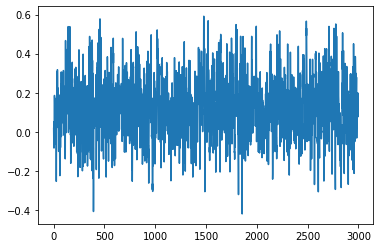

In [26]:
# training_set = pd.read_csv('train_v2.3.csv')
#training_set = pd.read_csv('shampoo.csv')

# training_set = x.values

plt.plot(ecg_np_data[0][:], label = 'Shampoo Sales Data')
plt.show()

In [27]:
len(df.iloc[:,-1])

17792

In [28]:
ecg_np_data.shape

(17792, 2998)

In [12]:
# x, y = sliding_windows(training_data, seq_length)
x = ecg_np_data
y = df.iloc[:,-1]

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[:,:train_size])))
trainY = Variable(torch.Tensor(np.array(y[:train_size])))

testX = Variable(torch.Tensor(np.array(x[:,train_size:])))
testY = Variable(torch.Tensor(np.array(y[train_size:])))

In [29]:
x_train = trainX.reshape(-1, 1, 2998) #将训练数据调整成pytorch中lstm算法的输入维度
y_train = trainY.reshape(-1, 1, 1)  #将目标值调整成pytorch中lstm算法的输出维度

In [40]:
# class LSTM(nn.Module):
#     def __init__(self, num_classes, input_size, hidden_size, num_layers):
#         super(LSTM, self).__init__()        
#         self.num_classes = num_classes
#         self.num_layers = num_layers
#         self.input_size = input_size
#         self.hidden_size = hidden_size
# #         self.seq_length = seq_length
        
#         self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
#                             num_layers=num_layers, batch_first=True)       
#         self.fc = nn.Linear(hidden_size, num_classes)

#     def forward(self, x):
#         h_0 = Variable(torch.zeros(
#             self.num_layers, x.size(0), self.hidden_size))       
#         c_0 = Variable(torch.zeros(
#             self.num_layers, x.size(0), self.hidden_size))
        
#         # Propagate input through LSTM
#         ula, (h_out, _) = self.lstm(x, (h_0, c_0))        
#         h_out = h_out.view(-1, self.hidden_size)
#         out = self.fc(h_out)       
#         return out

In [37]:
class RNN(nn.Module):
      def __init__(self):
        super(RNN,self).__init__() #面向对象中的继承
        self.lstm = nn.LSTM(2998,6,2) #输入数据2998个特征维度，6个隐藏层维度，2个LSTM串联，第二个LSTM接收第一个的计算结果
        self.out = nn.Linear(6,1) #线性拟合，接收数据的维度为6，输出数据的维度为1
      def forward(self,x):
        x1,_ = self.lstm(x)
        a,b,c = x1.shape
        out = self.out(x1.view(-1,c)) #因为线性层输入的是个二维数据，所以此处应该将lstm输出的三维数据x1调整成二维数据，最后的特征维度不能变
        out1 = out.view(a,b,-1) #因为是循环神经网络，最后的时候要把二维的out调整成三维数据，下一次循环使用
        return out1
rnn = RNN()

In [39]:
from tqdm.notebook import tqdm
from time import sleep
optimizer = torch.optim.Adam(rnn.parameters(),lr = 0.02)
loss_func = nn.MSELoss()
 #三、训练模型
for i in tqdm(range(100)):
        sleep(0.01)
        var_x = Variable(x_train).type(torch.FloatTensor)
        var_y = Variable(y_train).type(torch.FloatTensor)
        out = rnn(var_x)
        loss = loss_func(out,var_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print('Epoch:{}, Loss:{:.5f}'.format(i+1, loss.item()))

Epoch:1, Loss:0.00596
Epoch:2, Loss:0.01771
Epoch:3, Loss:0.00952
Epoch:4, Loss:0.00813
Epoch:5, Loss:0.00700
Epoch:6, Loss:0.00749
Epoch:7, Loss:0.00644
Epoch:8, Loss:0.00570
Epoch:9, Loss:0.00596
Epoch:10, Loss:0.00606
Epoch:11, Loss:0.00550
Epoch:12, Loss:0.00503
Epoch:13, Loss:0.00505
Epoch:14, Loss:0.00513
Epoch:15, Loss:0.00494
Epoch:16, Loss:0.00478
Epoch:17, Loss:0.00466
Epoch:18, Loss:0.00456
Epoch:19, Loss:0.00434
Epoch:20, Loss:0.00416
Epoch:21, Loss:0.00411
Epoch:22, Loss:0.00401
Epoch:23, Loss:0.00383
Epoch:24, Loss:0.00376
Epoch:25, Loss:0.00371
Epoch:26, Loss:0.00366
Epoch:27, Loss:0.00354
Epoch:28, Loss:0.00346
Epoch:29, Loss:0.00343
Epoch:30, Loss:0.00339
Epoch:31, Loss:0.00331
Epoch:32, Loss:0.00324
Epoch:33, Loss:0.00318
Epoch:34, Loss:0.00312
Epoch:35, Loss:0.00308
Epoch:36, Loss:0.00303
Epoch:37, Loss:0.00298
Epoch:38, Loss:0.00292
Epoch:39, Loss:0.00288
Epoch:40, Loss:0.00284
Epoch:41, Loss:0.00279
Epoch:42, Loss:0.00275
Epoch:43, Loss:0.00270
Epoch:44, Loss:0.002

In [44]:
x_test = testX.reshape(-1,1,2998)
y_test = testY.reshape(-1,1,1)
# var_dataX = Variable(dataX2).type(torch.FloatTensor)

pred = rnn(x_test)

pred_test = pred.view(-1).data.numpy()  #转换成一维的ndarray数据，这是预测值

In [46]:
type(pred_test)

numpy.ndarray

In [67]:
list = []
for i in pred_test:
    if i > 0:
        list.append(int(1))
    else:
        list.append(int(-1))

In [68]:
predict = np.array(list)

In [56]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [70]:
y_test1 = y_test.reshape(-1,1).numpy()

In [71]:
y_predict = predict.reshape(-1,1)

In [76]:
confusion_matrix(y_test1, y_predict)

array([[1685, 1387],
       [1675, 1125]], dtype=int64)

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1, y_predict)

array([[1685, 1387],
       [1675, 1125]], dtype=int64)

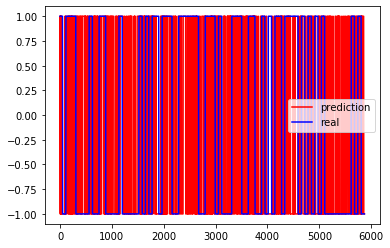

In [73]:
plt.plot(y_predict, 'r', label='prediction')
plt.plot(y_test1, 'b', label='real')
plt.legend(loc='best')

In [1]:
# num_epochs = 2000
# learning_rate = 0.01

# input_size = 1
# hidden_size = 2
# num_layers = 1
# num_classes = 2

# lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

# criterion = torch.nn.MSELoss()    # mean-squared error for regression
# optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
# #optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# # Train the model
# for epoch in range(num_epochs):
#     outputs = lstm(trainX)
#     optimizer.zero_grad()
    
#     # obtain the loss function
#     loss = criterion(outputs, trainY)
    
#     loss.backward()
    
#     optimizer.step()
#     if epoch % 100 == 0:
#       print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))